# Load and Preprocess Data

In [1]:
# import required libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/loan-default/Anonymize_Loan_Default_data.csv',
                   encoding='latin1', index_col=0)

In [3]:
# Display basic information about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38480 non-null  int64  
 1   member_id               38480 non-null  int64  
 2   loan_amnt               38479 non-null  float64
 3   funded_amnt             38479 non-null  float64
 4   funded_amnt_inv         38479 non-null  float64
 5   term                    38480 non-null  object 
 6   int_rate                38480 non-null  float64
 7   installment             38479 non-null  float64
 8   emp_length              37487 non-null  object 
 9   home_ownership          38480 non-null  object 
 10  annual_inc              38478 non-null  float64
 11  verification_status     38480 non-null  object 
 12  issue_d                 38480 non-null  object 
 13  loan_status             38480 non-null  object 
 14  purpose                 38480 non-null

# Data Preprocessing

In [4]:
# Drop rows with missing values or duplicate IDs
data.dropna(inplace=True)
data.drop_duplicates(subset='member_id', keep='first', inplace=True)

# Convert percentage strings to numerical values
data['revol_util'] = data['revol_util'].str.strip('%').astype(float)

# Convert term to numerical values
data['term'] = data['term'].str.extract('(\d+)').astype(int)

# Convert emp_length to numerical values
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)

# Convert issue_d and last_pymnt_d to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['home_ownership', 'verification_status', 'purpose', 'addr_state']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Feature scaling
scaler = StandardScaler()
numeric_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
                'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


# Exploratory Data Analysis

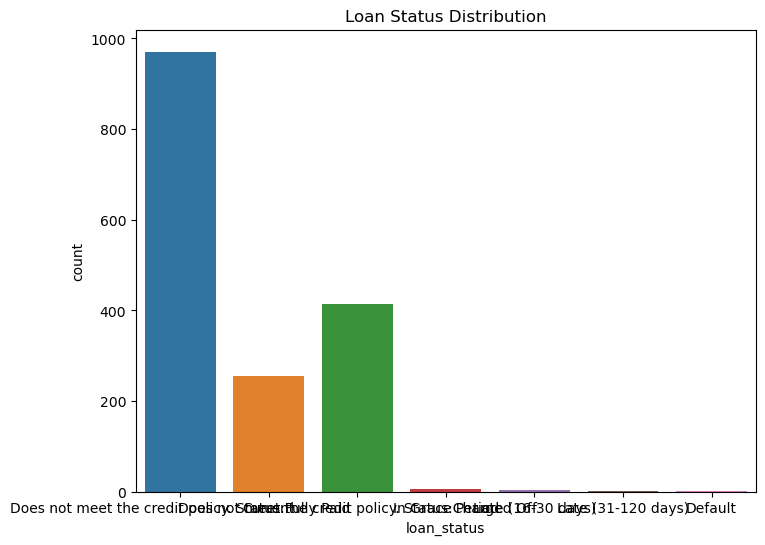

/tmp/ipykernel_343/4143152637.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


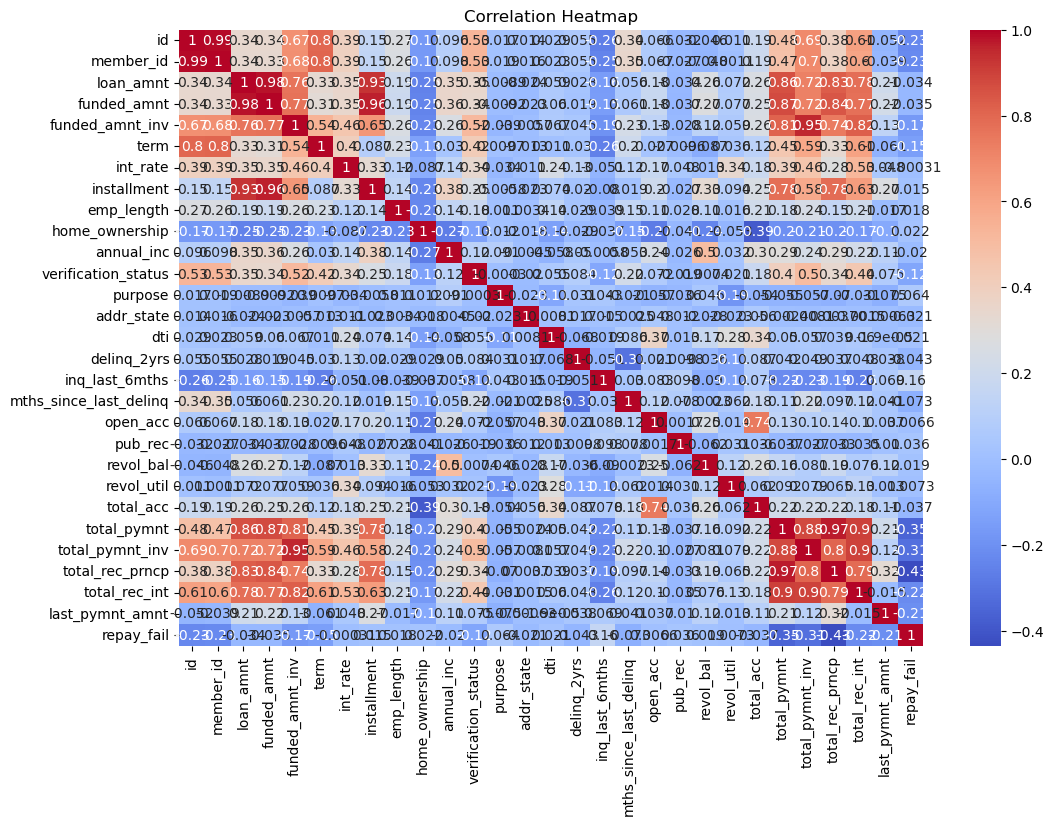

In [5]:
# Visualize the distribution of loan_status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='loan_status')
plt.title('Loan Status Distribution')
plt.show()

# Explore correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Model Training and Evaluation

In [6]:
# Split the data into features (X) and target (y)
X = data.drop(['loan_status', 'issue_d', 'last_pymnt_d',
               'last_credit_pull_d', 'earliest_cr_line',
               'next_pymnt_d', 'zip_code'], axis=1)
y = data['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.98
Classification Report:
                                                     precision    recall  f1-score   support

                                            Current       0.92      1.00      0.96        56
                                            Default       0.00      0.00      0.00         1
Does not meet the credit policy. Status:Charged Off       0.99      1.00      0.99        79
 Does not meet the credit policy. Status:Fully Paid       1.00      1.00      1.00       190
                                    In Grace Period       0.00      0.00      0.00         2
                                  Late (16-30 days)       0.00      0.00      0.00         1
                                 Late (31-120 days)       0.00      0.00      0.00         2

                                           accuracy                           0.98       331
                                          macro avg       0.42      0.43      0.42       331
                              

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
